In [12]:
import sys
import pandas as pd
import geopandas as gpd
import numpy as np
#import itertools
import ast
#import random
#from random import random, randint, choice, sample
import numpy as np, numpy.random

#from iteration_utilities import random_combination
%matplotlib inline
import matplotlib.pyplot as plt

#import osmnx as ox
import networkx as nx
import joblib
plt.style.use('seaborn-whitegrid')
import time
import seaborn as sns

C:\Users\armit\AppData\Local\Temp\ipykernel_16440\2100437211.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
grp = ['male_high_white', 'female_high_white', 
       'male_high_poc', 'female_high_poc', 
       'male_med_white', 'female_med_white', 
       'male_med_poc', 'female_med_poc', 
       'male_low_white', 'female_low_white',
       'male_low_poc', 'female_low_poc']

In [6]:
#road dataset with no sidewalk
gap1 = pd.read_csv(r'Data\sidewalk_gap_hilltop.csv')
#gap2 = gap1
nearest_dat = pd.read_pickle(r'data\Hilltop_nearest_rd.pkl')
nearest_dat = nearest_dat[['OBJECTID', 'nearest']]
nn = nearest_dat.groupby(['OBJECTID'],sort=False).sum().reset_index()

C:\ProgramData\anaconda3\Lib\pickle.py:1718: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  setstate(state)


In [8]:
road = gpd.read_file(r'Data\Franklin_street_centerline_MORPC\Franklin_street_centerline_MORPC.shp')
road['Fclass'] = [int(road['Fclass'].iloc[i])  if road['Fclass'].iloc[i] != None else 0 for i in range(len(road))]
road = road[(road['Fclass'] >2) & (road['Fclass'] < 8)]

area = gpd.read_file(r'Data\Area_Commissions\Area_Commissions.shp')
sa = area[(area.AREA_NAME == 'Greater Hilltop Area Commission') ]
sa_rd = gpd.sjoin(road, sa, op='intersects')
sa_rd['sidewalk_b'] = ['N' if sa_rd.SIDEWALK.iloc[i] == 'N' else 'Y' for i in range(len(sa_rd))]
sa_rd['OBJECTID'] = sa_rd['OBJECTID_left']

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


## plot model solutions

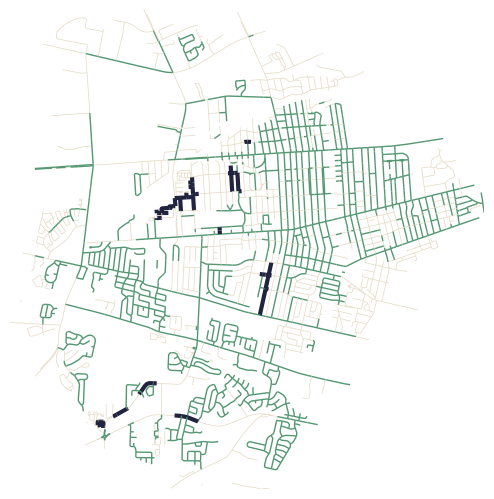

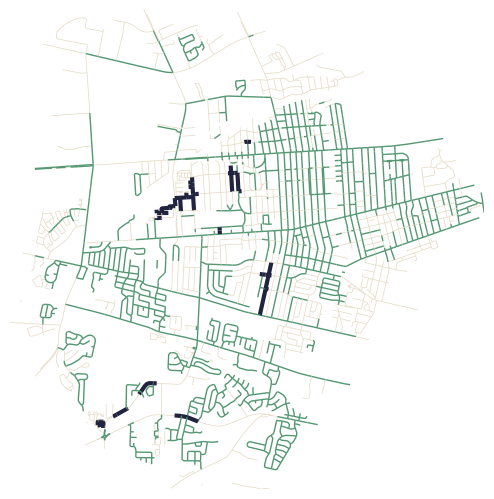

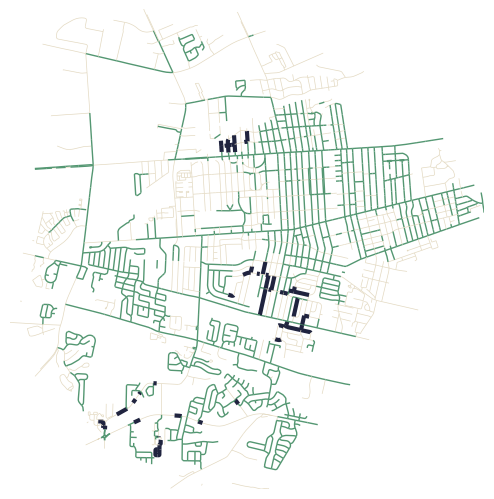

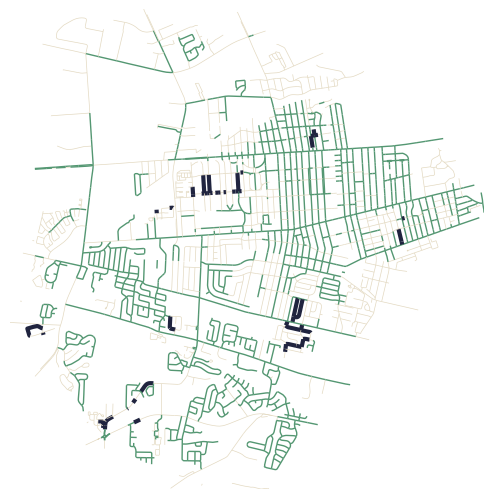

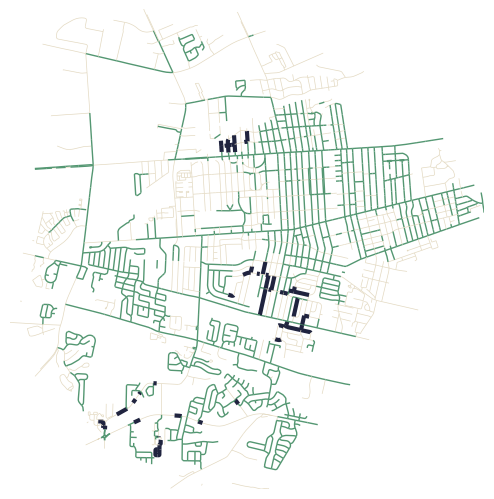

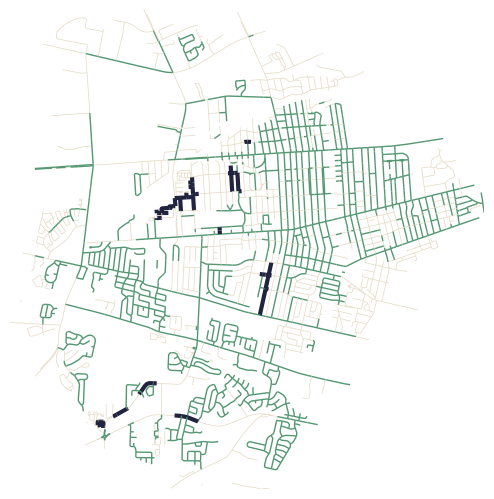

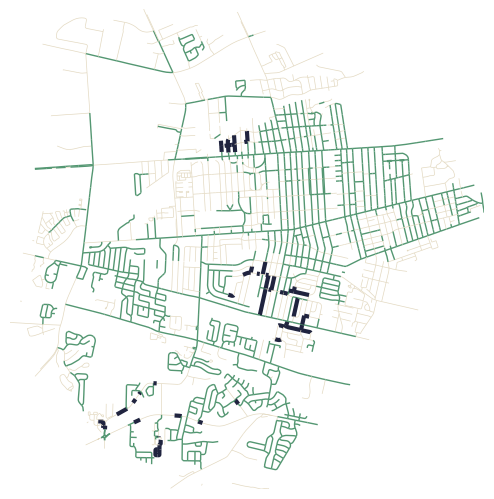

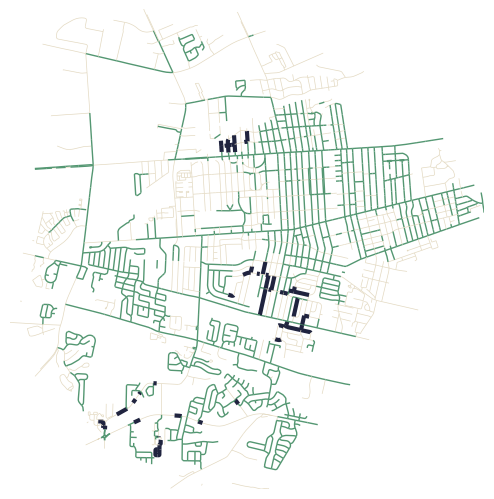

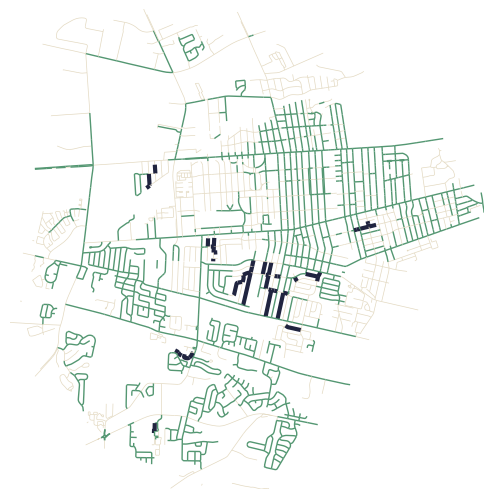

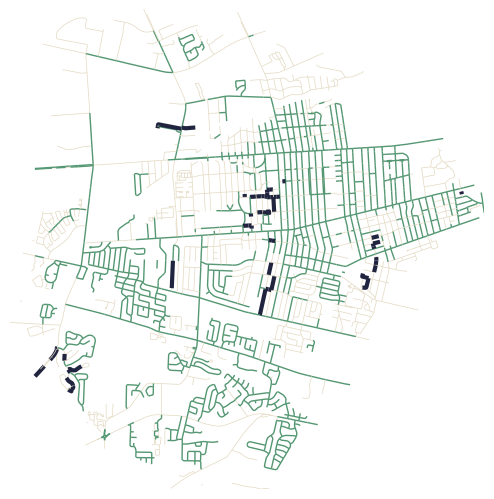

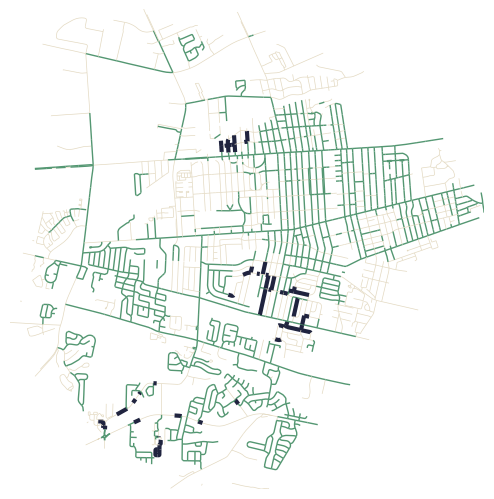

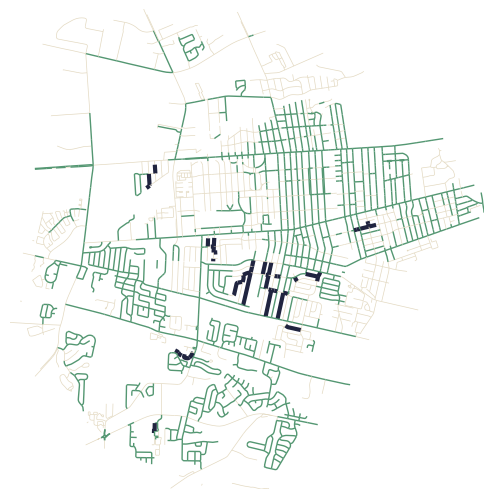

In [15]:
#### plot extreme/optimal solutions
area = "hilltop"
dat = pd.read_csv(r'Output\%s_final solutions_sorted.csv'%area)

for i in grp:
    dat1 = dat[dat['sol_type'] == 'Extreme (%s)'%i]
    
    gap1['sol']  = ast.literal_eval(dat1['sols'].iloc[0])
    #gap1['sol']  = dat1['sols'].iloc[i]
    gap1['sol'].unique()
    ab = gap1[['OBJECTID', 'sol']]

    sa_rd1 = pd.merge(sa_rd, ab, on= 'OBJECTID', how = 'outer')
    sa_rd1['sol'] = sa_rd1['sol'].fillna('Existing sidewalks')
    sa_rd1['sol'] = sa_rd1['sol'].replace(1,'New sidewalks')
    sa_rd1['sol'] = sa_rd1['sol'].replace(0.0,' No sidewalk')
    sa_rd1['sol1'] = [3.0 if sa_rd1['sol'].iloc[i] == 'New sidewalks' else 1.0 if sa_rd1['sol'].iloc[i] == 'Existing sidewalks' 
                      else 0.5 for i in range(len(sa_rd1))]
    
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')

    sa_rd1.plot('sol', ax = ax,
                legend=False, cmap=sns.cubehelix_palette(start=.25, rot=-.75, as_cmap=True), 
                figsize=(5,8), 
                #legend_kwds={'loc': 'lower right', 'fontsize': 15}, 
                linewidth = sa_rd1['sol1']).set_axis_off()
    ax.margins(0)
    ax.apply_aspect()
    bbox = ax.get_window_extent().transformed(fig.transFigure.inverted())
    w,h = fig.get_size_inches()
    fig.set_size_inches(w*bbox.width, h*bbox.height)

    #plt.savefig('sample.png')
    plt.savefig(r'Output\Images\%s_extreme_%s.png'%(area, i), dpi=100)
    

# plot naive solutions

In [ ]:
#### plot naive solutions
area = "hilltop"
dat = pd.read_csv(r'Output\%s_naive_solution.csv'%area)

for i in range(len(dat)):
    gap1['sol']  = ast.literal_eval(dat['sols'].iloc[i])
    gap1['sol'].unique()
    ab = gap1[['OBJECTID', 'sol']]

    sa_rd1 = pd.merge(sa_rd, ab, on= 'OBJECTID', how = 'outer')
    sa_rd1['sol'] = sa_rd1['sol'].fillna('Existing sidewalks')
    sa_rd1['sol'] = sa_rd1['sol'].replace(1,'New sidewalks')
    sa_rd1['sol'] = sa_rd1['sol'].replace(0.0,' No sidewalk')
    sa_rd1['sol1'] = [3.0 if sa_rd1['sol'].iloc[i] == 'New sidewalks' else 1.0 if sa_rd1['sol'].iloc[i] == 'Existing sidewalks' 
                      else 0.5 for i in range(len(sa_rd1))]

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')

    sa_rd1.plot('sol', ax = ax,
                legend=False, cmap=sns.cubehelix_palette(start=.25, rot=-.75, as_cmap=True), 
                figsize=(5,8), 
                #legend_kwds={'loc': 'lower right', 'fontsize': 15}, 
                linewidth = sa_rd1['sol1']).set_axis_off()
    ax.margins(0)
    ax.apply_aspect()
    bbox = ax.get_window_extent().transformed(fig.transFigure.inverted())
    w,h = fig.get_size_inches()
    fig.set_size_inches(w*bbox.width, h*bbox.height)
    
    plt.savefig(r'Output\Images\%s_naive_%s.png'%(area, i), dpi=500)